# Libraries Import

In [123]:
import pandas as pd
import numpy as np

# for Plots
import matplotlib.pyplot as plt
import seaborn as sns

# for Preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler

# for multicollinearity-detection
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Reading Files

In [2]:
train = pd.read_csv(r"D:\Inceptez\Data Science\Datasets\BigMart\train.csv")
test = pd.read_csv(r"D:\Inceptez\Data Science\Datasets\BigMart\test.csv")

# Defining Functions

In [79]:
def get_metadata(dataframe):
    '''Gets all the Metadata Information about the Dataframe'''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 80)
    print("STATISTICAL INFORMATION\n")
    display(dataframe.describe(include='all').T)
    print("=" * 80)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 80)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 80)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 80)
    print("UNIQUE VALUES IN EVERY COLUMN")
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].unique())
        print('-' * 80)
    categorical_cols = [var for var in dataframe.columns if dataframe[var].dtype=='O']
    numerical_cols = [var for var in dataframe.columns if dataframe[var].dtype!='O']
    print("CATEGORICAL FEATURES\n", categorical_cols)
    print("=" * 80)
    print("NUMERICAL FEATURES\n", numerical_cols)
    print("=" * 80)
    print("Negative Valued Column")
    for col in numerical_cols:
        if min(dataframe[col]) < 0:
            print(col)
    print("=" * 80)
    display(dataframe.head(3))

In [5]:
# get_metadata(test)

# Pre-Processing

## Replacing Values

In [6]:
train.replace({'Item_Fat_Content' : {'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}}, inplace=True)
test.replace({'Item_Fat_Content' : {'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}}, inplace=True)

In [24]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [25]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## Filling NaN Values

### Item_Weight

In [7]:
train['Item_Weight'].fillna(train.groupby(['Item_Identifier', 'Item_Fat_Content', 'Item_Type'])['Item_Weight'].transform('mean'), inplace=True)
test['Item_Weight'].fillna(test.groupby(['Item_Identifier', 'Item_Fat_Content', 'Item_Type'])['Item_Weight'].transform('mean'), inplace=True)

In [27]:
train['Item_Weight'].isnull().sum()

4

In [28]:
test['Item_Weight'].isnull().sum()

20

In [8]:
train['Item_Weight'].fillna(train.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Weight'].transform('mean'), inplace=True)
test['Item_Weight'].fillna(test.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Weight'].transform('mean'), inplace=True)

In [30]:
train['Item_Weight'].isnull().sum()

0

In [31]:
test['Item_Weight'].isnull().sum()

0

### Outlet_Size

In [14]:
# bigmart_train[['Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Type', 'Outlet_Location_Type']].drop_duplicates().to_csv('Outlet_Details.csv', index=None)

In [107]:
def cat_outlet_Type(row):
    if (row['Outlet_Location_Type']=='Tier 3') & (row['Outlet_Type']=='Grocery Store'):
        return 'Medium'
    elif (row['Outlet_Location_Type']=='Tier 2') & (row['Outlet_Type']=='Supermarket Type1'):
        return 'Small'
    elif (row['Outlet_Location_Type']=='Tier 3') & (row['Outlet_Type']=='Supermarket Type1'):
        return 'High'
    else:
        return 'Medium'
train['Outlet_Size'] = train.apply(cat_outlet_Type, axis=1)
test['Outlet_Size'] = test.apply(cat_outlet_Type, axis=1)

In [108]:
train['Outlet_Size'].isnull().sum()

0

In [109]:
train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [34]:
test['Outlet_Size'].isnull().sum()

0

# EDA

## Plots

### Numerical Colums

Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails  
 
 It is the sharpness of the peak of a frequency-distribution curve .It is actually the measure of outliers present in the distribution.

· High kurtosis in a data set is an indicator that data has heavy outliers.

· Low kurtosis in a data set is an indicator that data has lack of outliers.

· If kurtosis value + means pointy and — means flat.

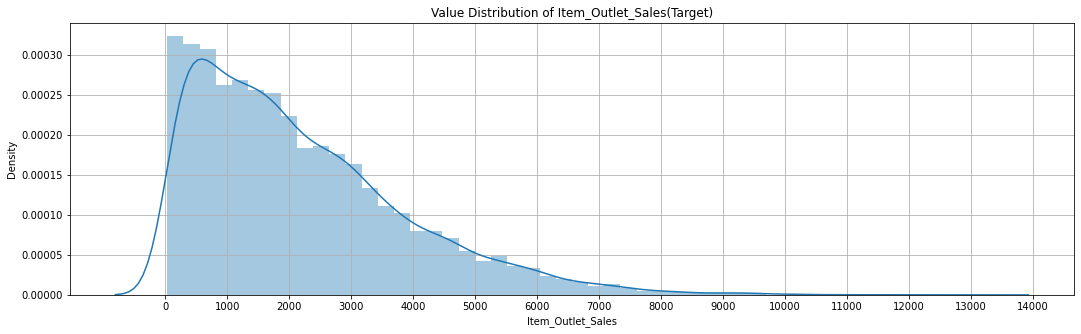

Skew Value    : 1.1775306028542796
Kurtosis Value: 1.6158766814287264


In [169]:
plt.figure(figsize=(18, 5))
plt.title('Value Distribution of Item_Outlet_Sales(Target)')
sns.distplot(train['Item_Outlet_Sales'])
plt.grid()
plt.xticks(np.arange(0, 15000, step=1000))
plt.show()
print("Skew Value    :", train['Item_Outlet_Sales'].skew())
print("Kurtosis Value:", train['Item_Outlet_Sales'].kurt())

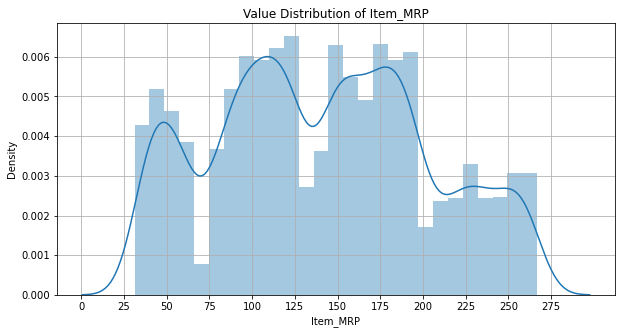

Skew Value    : 0.1272022683110526
Kurtosis Value: -0.8897690936963571


In [167]:
plt.figure(figsize=(10, 5))
plt.title('Value Distribution of Item_MRP')
sns.distplot(train['Item_MRP'])
plt.grid()
plt.xticks(np.arange(0, 300, step=25))
plt.show()
print("Skew Value    :", train['Item_MRP'].skew())
print("Kurtosis Value:", train['Item_MRP'].kurt())

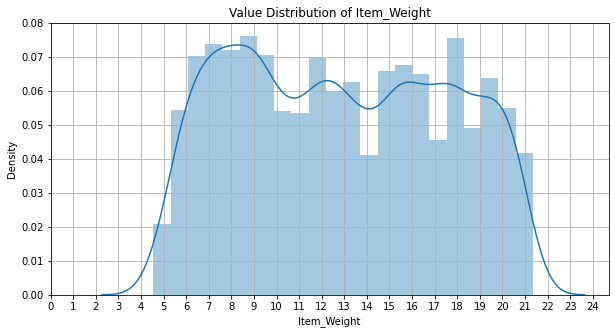

Skew Value    : 0.07027458029994592
Kurtosis Value: -1.2298777719716218


In [170]:
plt.figure(figsize=(10, 5))
plt.title('Value Distribution of Item_Weight')
sns.distplot(train['Item_Weight'])
plt.grid()
plt.xticks(np.arange(0, 25, step=1))
plt.show()
print("Skew Value    :", train['Item_Weight'].skew())
print("Kurtosis Value:", train['Item_Weight'].kurt())


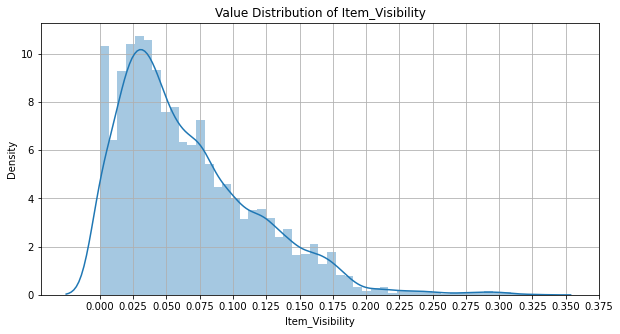

Skew Value    : 1.1670905496918396
Kurtosis Value: 1.6794454826024237


In [171]:
plt.figure(figsize=(10, 5))
plt.title('Value Distribution of Item_Visibility')
sns.distplot(train['Item_Visibility'])
plt.grid()
plt.xticks(np.arange(0, 0.40, step=0.025))
plt.show()
print("Skew Value    :", train['Item_Visibility'].skew())
print("Kurtosis Value:", train['Item_Visibility'].kurt())

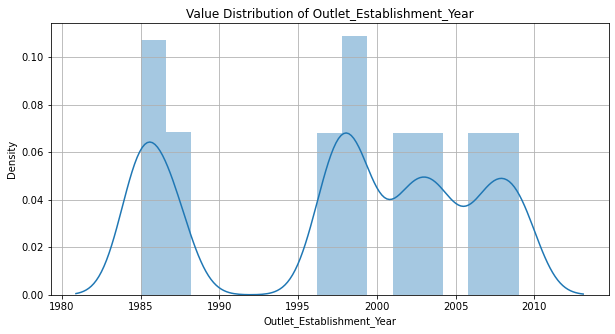

Skew Value    : -0.39664078591550556
Kurtosis Value: -1.2056939170205112


In [172]:
plt.figure(figsize=(10, 5))
plt.title('Value Distribution of Outlet_Establishment_Year')
sns.distplot(train['Outlet_Establishment_Year'])
plt.grid()
# plt.xticks(np.arange(0, 0.40, step=0.025))
plt.show()
print("Skew Value    :", train['Outlet_Establishment_Year'].skew())
print("Kurtosis Value:", train['Outlet_Establishment_Year'].kurt())

### Categorical Variables

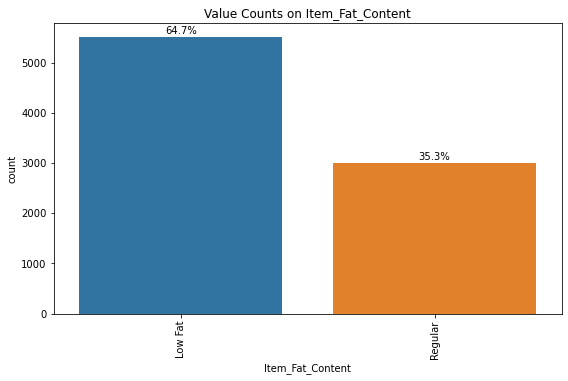

In [13]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Item_Fat_Content', data=train)
plt.title('Value Counts on Item_Fat_Content')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

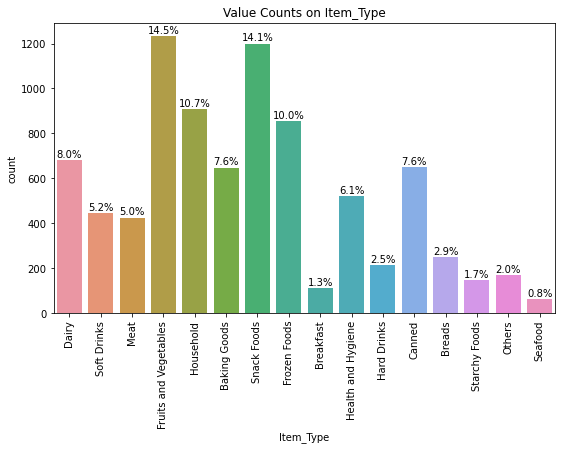

In [12]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Item_Type', data=train)
plt.title('Value Counts on Item_Type')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

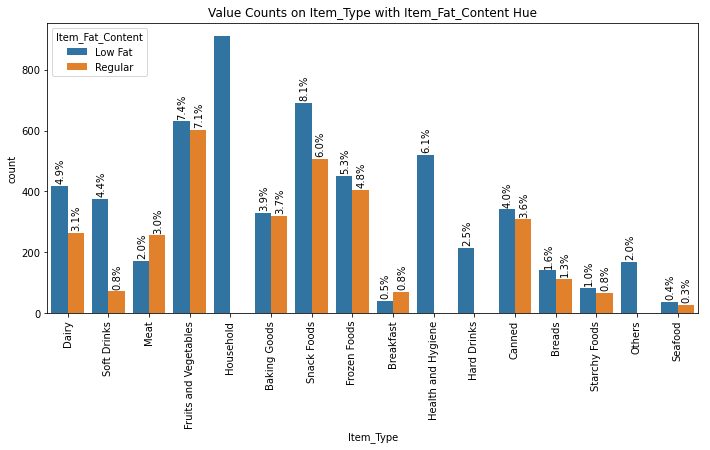

In [174]:
plt.figure(figsize=(10, 5))
resp_count = sns.countplot(x='Item_Type', data=train, hue='Item_Fat_Content')
plt.title('Value Counts on Item_Type with Item_Fat_Content Hue')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + 0.1
    y = p.get_height() + 50
    resp_count.annotate(percentage, (x, y), va='center', rotation=90)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

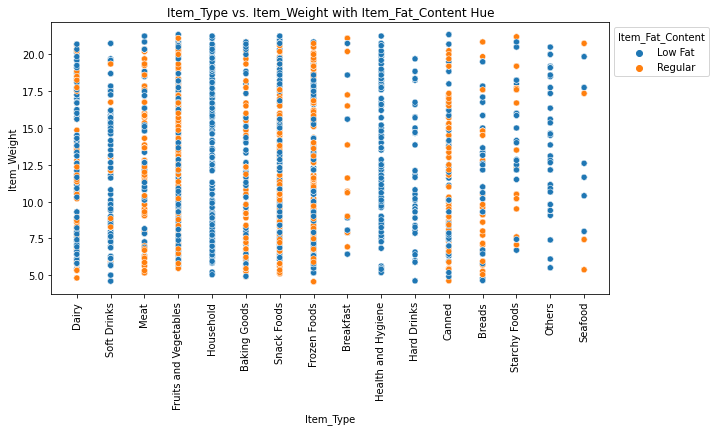

In [175]:
# REMOVE
plt.figure(figsize=(10, 5))
plt.title('Item_Type vs. Item_Weight with Item_Fat_Content Hue')
ax = sns.scatterplot(data=train, x='Item_Type', y='Item_Weight', hue='Item_Fat_Content')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

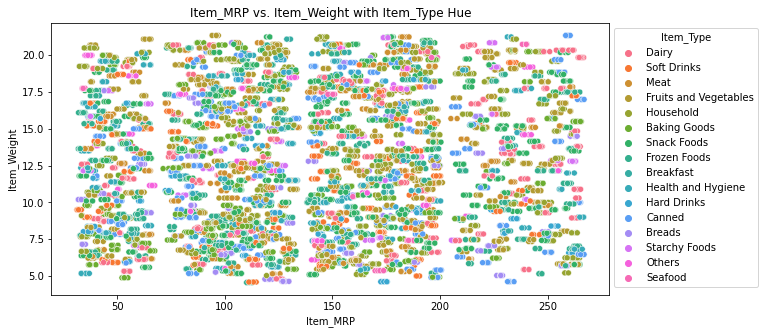

In [177]:
# REMOVE
plt.figure(figsize=(10, 5))
plt.title('Item_MRP vs. Item_Weight with Item_Type Hue')
ax = sns.scatterplot(x=train['Item_MRP'], y=train['Item_Weight'], hue=train['Item_Type'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.xticks(rotation=90)
plt.show()

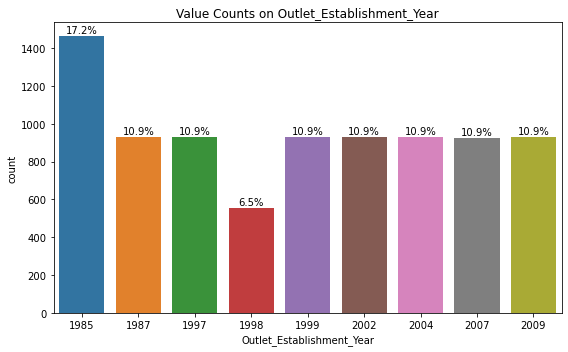

In [104]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.title('Value Counts on Outlet_Establishment_Year')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

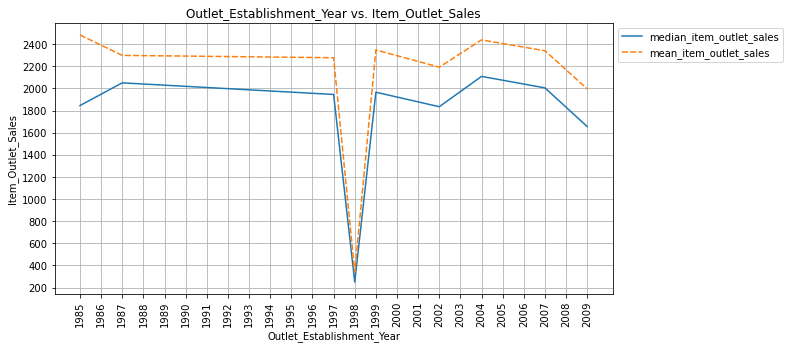

In [183]:
outlet_est_sales = train.groupby(['Outlet_Establishment_Year']).agg(median_item_outlet_sales=('Item_Outlet_Sales', 'median'), mean_item_outlet_sales=('Item_Outlet_Sales', 'mean'))
plt.figure(figsize=(10, 5))
plt.title('Outlet_Establishment_Year vs. Item_Outlet_Sales')
ax = sns.lineplot(data=outlet_est_sales)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.xticks(np.arange(1985, 2010, step=1), rotation=90)
plt.ylabel('Item_Outlet_Sales')
plt.yticks(np.arange(200, 2600, step=200))
plt.show()

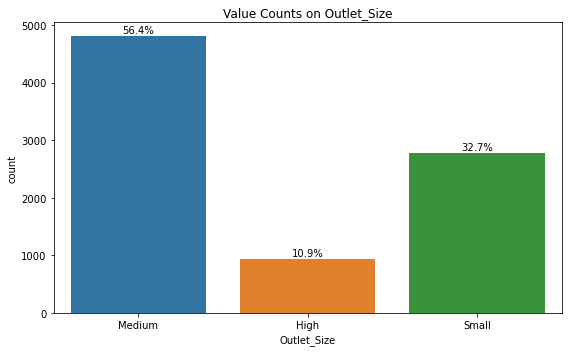

In [110]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Outlet_Size', data=train)
plt.title('Value Counts on Outlet_Size')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

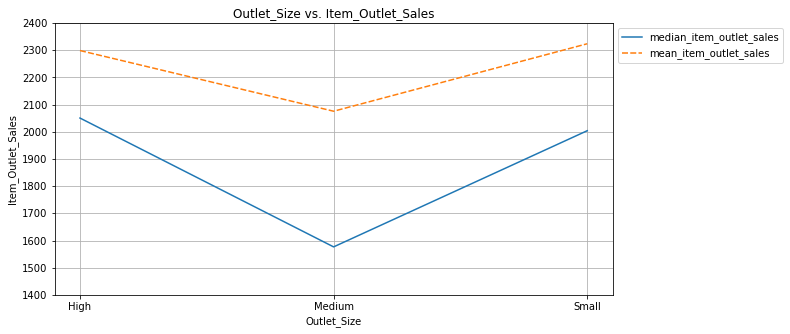

In [184]:
outlet_size_sales = train.groupby(['Outlet_Size']).agg(median_item_outlet_sales=('Item_Outlet_Sales', 'median'), mean_item_outlet_sales=('Item_Outlet_Sales', 'mean'))
plt.figure(figsize=(10, 5))
plt.title('Outlet_Size vs. Item_Outlet_Sales')
ax = sns.lineplot(data=outlet_size_sales)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel('Item_Outlet_Sales')
plt.yticks(np.arange(1400, 2500, step=100))
plt.show()

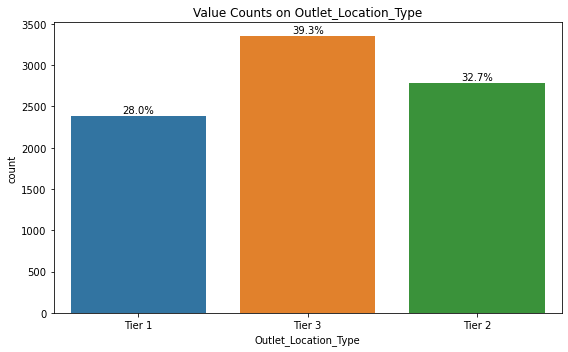

In [158]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Outlet_Location_Type', data=train)
plt.title('Value Counts on Outlet_Location_Type')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

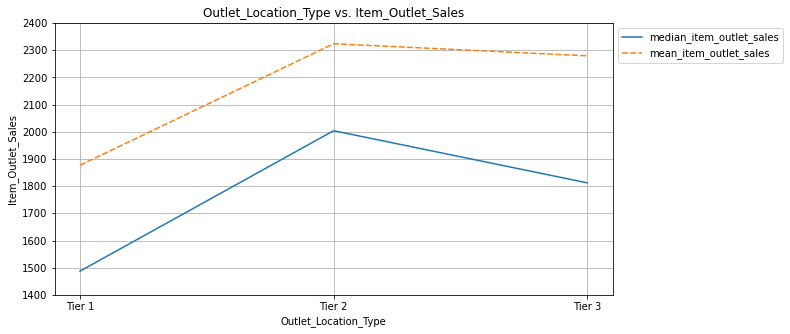

In [185]:
Outlet_Location_Type_sales = train.groupby(['Outlet_Location_Type']).agg(median_item_outlet_sales=('Item_Outlet_Sales', 'median'), mean_item_outlet_sales=('Item_Outlet_Sales', 'mean'))
plt.figure(figsize=(10, 5))
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales')
ax = sns.lineplot(data=Outlet_Location_Type_sales)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel('Item_Outlet_Sales')
plt.yticks(np.arange(1400, 2500, step=100))
plt.show()

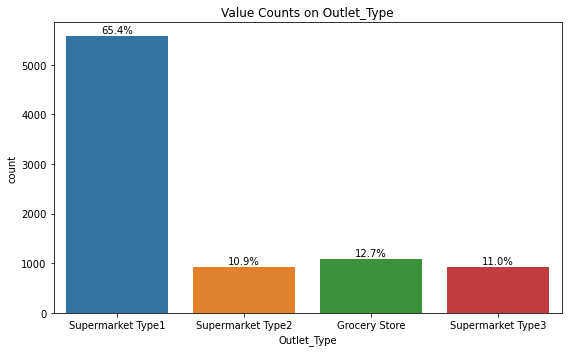

In [159]:
plt.figure(figsize=(8, 5))
resp_count = sns.countplot(x='Outlet_Type', data=train)
plt.title('Value Counts on Outlet_Type')
total = len(train)
for p in resp_count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    resp_count.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

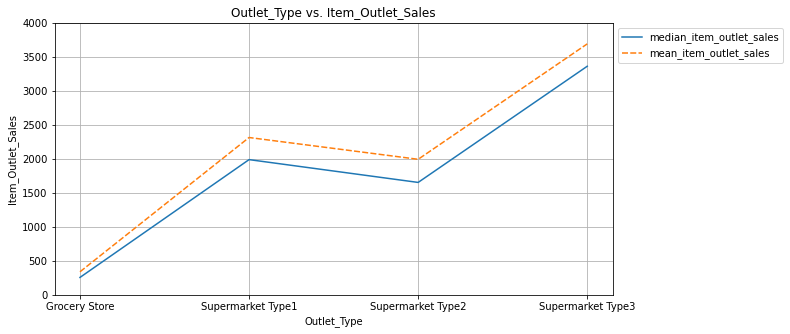

In [191]:
Outlet_Type_sales = train.groupby(['Outlet_Type']).agg(median_item_outlet_sales=('Item_Outlet_Sales', 'median'), mean_item_outlet_sales=('Item_Outlet_Sales', 'mean'))
plt.figure(figsize=(10, 5))
plt.title('Outlet_Type vs. Item_Outlet_Sales')
ax = sns.lineplot(data=Outlet_Type_sales)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel('Item_Outlet_Sales')
plt.yticks(np.arange(0, 4500, step=500))
plt.show()

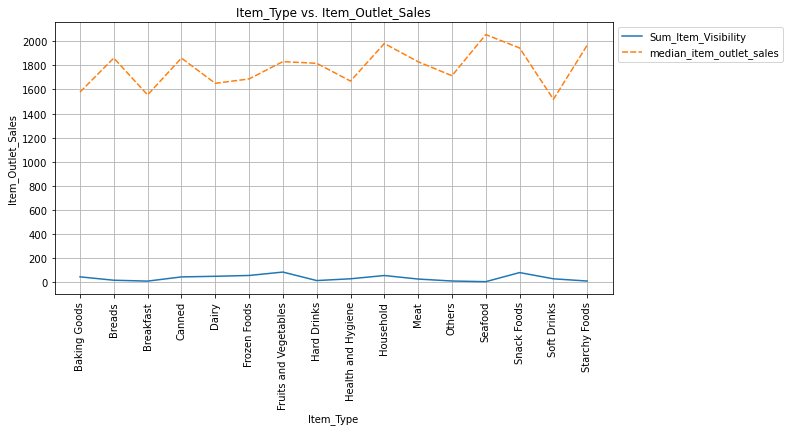

In [193]:
item_vis = train.groupby(['Item_Type']).agg(Sum_Item_Visibility=('Item_Visibility', 'sum'), median_item_outlet_sales=('Item_Outlet_Sales', 'median'))
plt.figure(figsize=(10, 5))
plt.title('Item_Type vs. Item_Outlet_Sales')
ax = sns.lineplot(data=item_vis)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Item_Outlet_Sales')
plt.yticks(np.arange(0, 2100, step=200))
plt.show()

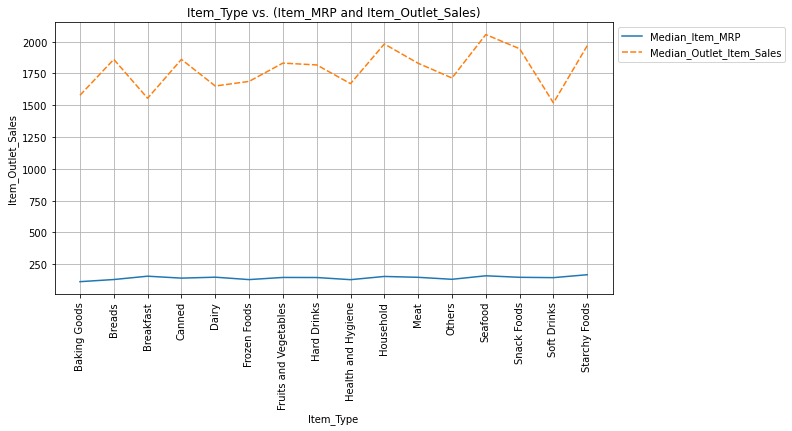

In [195]:
item_mrp_total_sales = train.groupby(['Item_Type']).agg(Median_Item_MRP=('Item_MRP', 'median'), Median_Outlet_Item_Sales=('Item_Outlet_Sales', 'median'))
plt.figure(figsize=(10, 5))
plt.title('Item_Type vs. (Item_MRP and Item_Outlet_Sales)')
ax = sns.lineplot(data=item_mrp_total_sales)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Item_Outlet_Sales')
plt.show()

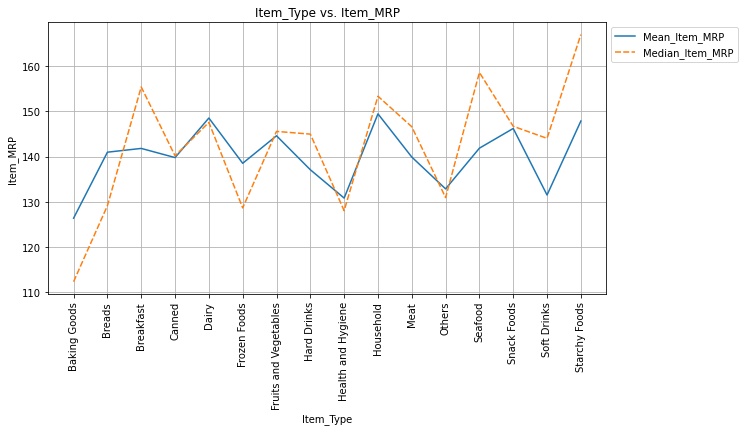

In [196]:
mrp_item_type = train.groupby(['Item_Type']).agg(Mean_Item_MRP=('Item_MRP', 'mean'), Median_Item_MRP=('Item_MRP', 'median'))
plt.figure(figsize=(10, 5))
plt.title('Item_Type vs. Item_MRP')
ax = sns.lineplot(data=mrp_item_type)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Item_MRP')
plt.show()

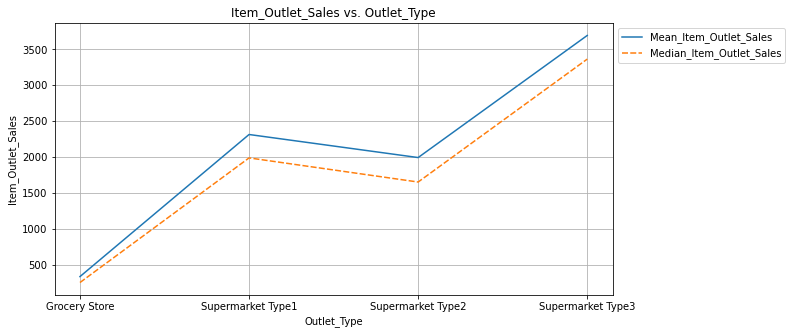

In [197]:
outlet_type_sales = train.groupby(['Outlet_Type']).agg(Mean_Item_Outlet_Sales=('Item_Outlet_Sales', 'mean'), Median_Item_Outlet_Sales=('Item_Outlet_Sales', 'median'))
plt.figure(figsize=(10, 5))
plt.title('Item_Outlet_Sales vs. Outlet_Type')
ax = sns.lineplot(data=outlet_type_sales)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel('Item_Outlet_Sales')
plt.show()

## Outliers

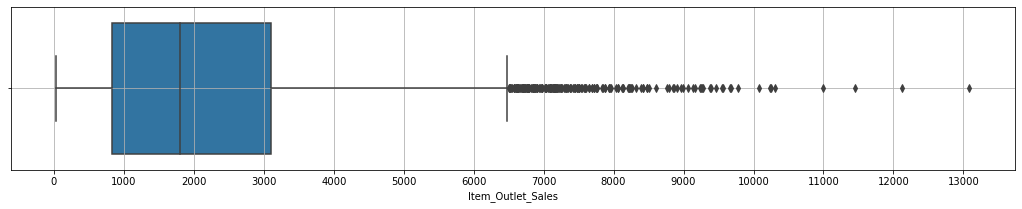

In [ ]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Item_Outlet_Sales')
sns.boxplot(x = train['Item_Outlet_Sales'])
plt.grid()
plt.xticks(np.arange(0, 13500, step=1000))
plt.show()

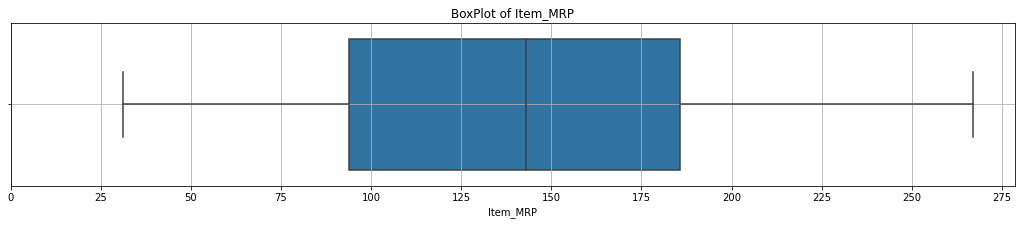

In [198]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Item_MRP')
sns.boxplot(x = train['Item_MRP'])
plt.grid()
plt.xticks(np.arange(0, 300, step=25))
plt.show()

## Encoding

In [124]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [126]:
id_cols = ['Item_Identifier', 'Outlet_Identifier']
nominal_cols = ['Item_Fat_Content', 'Item_Type']
ordinal_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
target_col = ['Item_Outlet_Sales']
print(len(train.columns))
print(len(id_cols+nominal_cols+ordinal_cols+numerical_cols+target_col))

12
12


In [133]:
train_enc = train.drop(id_cols, axis=1)
train_enc.replace({'Outlet_Size' : {'Small' : 1, 'Medium' : 2, 'High': 3}, 
                'Outlet_Location_Type': {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3},
                'Outlet_Type': {'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}}, inplace=True)
train_encoded = pd.get_dummies(train_enc, columns=nominal_cols, drop_first=True)
train_encoded.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,2,1,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,2,3,2,443.4228,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2,1,1,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0


## Correlation Matrix

In [165]:
corr_matrix = train_enc.corr()
corr_matrix.style.background_gradient(cmap='YlGn').set_precision(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000,-0.009,0.026,-0.013,0.017,0.003,0.001,0.013
Item_Visibility,-0.009,1.000,-0.001,-0.075,0.031,-0.028,-0.173,-0.129
Item_MRP,0.026,-0.001,1.000,0.005,-0.000,0.000,-0.002,0.568
Outlet_Establishment_Year,-0.013,-0.075,0.005,1.000,-0.634,-0.089,-0.122,-0.049
Outlet_Size,0.017,0.031,-0.000,-0.634,1.000,0.264,0.088,-0.032
Outlet_Location_Type,0.003,-0.028,0.000,-0.089,0.264,1.000,0.467,0.089
Outlet_Type,0.001,-0.173,-0.002,-0.122,0.088,0.467,1.000,0.402
Item_Outlet_Sales,0.013,-0.129,0.568,-0.049,-0.032,0.089,0.402,1.000


## MultiCollinearity

In [136]:
vif_data_1 = pd.DataFrame()
vif_data_1["feature"] = train_encoded.columns
  
vif_data_1["VIF"] = [variance_inflation_factor(train_encoded.values, i) for i in range(len(train_encoded.columns))]
vif_data_1

,feature,VIF
0,Item_Weight,8.836065
1,Item_Visibility,2.775679
2,Item_MRP,10.181869
3,Outlet_Establishment_Year,38.943903
4,Outlet_Size,9.814289
5,Outlet_Location_Type,10.848586
6,Outlet_Type,5.661058
7,Item_Outlet_Sales,5.285912
8,Item_Fat_Content_Regular,1.879810
9,Item_Type_Breads,1.390835


In [138]:
vif_data_2 = pd.DataFrame()
train_encoded_ = train_encoded.drop(['Outlet_Establishment_Year', 'Outlet_Location_Type'], axis=1)
vif_data_2["feature"] = train_encoded_.columns
  
vif_data_2["VIF"] = [variance_inflation_factor(train_encoded_.values, i) for i in range(len(train_encoded_.columns))]
vif_data_2

,feature,VIF
0,Item_Weight,7.225466
1,Item_Visibility,2.616277
2,Item_MRP,9.163242
3,Outlet_Size,7.703543
4,Outlet_Type,4.150616
5,Item_Outlet_Sales,5.157227
6,Item_Fat_Content_Regular,1.814193
7,Item_Type_Breads,1.248946
8,Item_Type_Breakfast,1.128382
9,Item_Type_Canned,1.675667
